In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import json

In [5]:
with open("sarcasm.json","r") as f:
    datastore = json.load(f)

In [7]:
datastore[:10]

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [9]:

sentences = []
labels = []
links = []

for item in datastore:
    sentences.append(item["headline"])
    labels.append(item["is_sarcastic"])
    links.append(item["article_link"])

In [10]:
len(sentences)

26709

In [11]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = "post"
padding_type = "post"
oov_token = "<OOV>"
training_size = 20000

In [12]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [15]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)

In [16]:
training_padded = pad_sequences(training_sequences,padding=padding_type,truncating=trunc_type,maxlen=max_length)

In [17]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,truncating=trunc_type,padding=padding_type)

In [18]:
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [19]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(24,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [20]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [23]:
num_epochs = 30
history = model.fit(training_padded,training_labels,epochs=num_epochs,validation_data=(testing_padded,testing_labels),verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 1s - loss: 0.6655 - accuracy: 0.5852 - val_loss: 0.5760 - val_accuracy: 0.8018
Epoch 2/30
20000/20000 - 1s - loss: 0.4188 - accuracy: 0.8356 - val_loss: 0.3821 - val_accuracy: 0.8340
Epoch 3/30
20000/20000 - 1s - loss: 0.3026 - accuracy: 0.8779 - val_loss: 0.3552 - val_accuracy: 0.8474
Epoch 4/30
20000/20000 - 1s - loss: 0.2509 - accuracy: 0.9011 - val_loss: 0.3465 - val_accuracy: 0.8515
Epoch 5/30
20000/20000 - 1s - loss: 0.2174 - accuracy: 0.9157 - val_loss: 0.3540 - val_accuracy: 0.8487
Epoch 6/30
20000/20000 - 1s - loss: 0.1888 - accuracy: 0.9291 - val_loss: 0.3561 - val_accuracy: 0.8547
Epoch 7/30
20000/20000 - 1s - loss: 0.1661 - accuracy: 0.9372 - val_loss: 0.3771 - val_accuracy: 0.8535
Epoch 8/30
20000/20000 - 1s - loss: 0.1491 - accuracy: 0.9464 - val_loss: 0.3902 - val_accuracy: 0.8527
Epoch 9/30
20000/20000 - 1s - loss: 0.1331 - accuracy: 0.9524 - val_loss: 0.4365 - val_accuracy: 0.8401
Epoch 10/30
200

In [28]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib inline

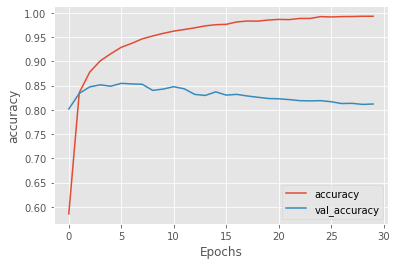

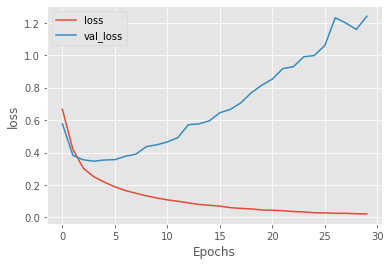

In [29]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_" + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, "val_" + string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [37]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

def decode_sentence(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

print(training_padded[2])
print()
print(decode_sentence(training_padded[2]))
print(training_sentences[2])
print(labels[2])

[ 153  890    2  891 1445 2215  595 5650  221  133   36   45    2 8864
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]

mom starting to fear son's web series closest thing she will have to grandchild ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [38]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [39]:
import io

In [40]:
out_v = io.open("vecs_1.tsv","w",encoding="utf-8")
out_m = io.open("meta_1.tsv","w",encoding="utf-8")

for word_num in range(1,vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write("\t".join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [43]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [44]:
print(model.predict(padded))

[[9.4102430e-01]
 [2.0193757e-07]]
